In [44]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc 
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv",
    na_values=['NA','?'])


df.drop("id", axis=1, inplace=True)
x_columns = df.columns.drop('diagnosis')
for col in x_columns:
    df[col] = zscore(df[col])
display(df[0:5])




,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


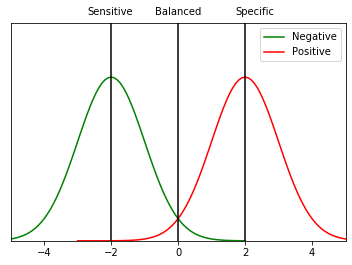

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu1 = -2
mu2 = 2
variance = 1
sigma = math.sqrt(variance)
x1 = np.linspace(mu1 - 5*sigma, mu1 + 4*sigma, 100)
x2 = np.linspace(mu2 - 5*sigma, mu2 + 4*sigma, 100)
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma)/1,color="green")
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma)/1,color="red")
plt.axvline(x=-2,color="black")
plt.axvline(x=0,color="black")
plt.axvline(x=+2,color="black")
plt.text(-2.7,0.55,"Sensitive")
plt.text(-0.7,0.55,"Balanced")
plt.text(1.7,0.55,"Specific")
plt.ylim([0,0.53])
plt.xlim([-5,5])
plt.legend(['Negative','Positive'])
plt.yticks([])
#plt.set_yticklabels([])
plt.show()

In [4]:
x = df[x_columns].values
y = df["diagnosis"].map({"M": 1, "B":0})

In [61]:
def plot_confusion_matrix(cm, names, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
def plot_roc(y, pred):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation="relu", kernel_initializer="random_normal"))
model.add(Dense(50, activation="relu", kernel_initializer="random_normal"))
model.add(Dense(25, activation="relu", kernel_initializer="random_normal"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="random_normal"))

model.compile(loss="binary_crossentropy", 
             optimizer = tensorflow.keras.optimizers.Adam(),
             metrics = ["accuracy"])
monitor = EarlyStopping(monitor="val_loss", min_delta=1e-3, patience=5, verbose=1, mode="auto",
                       restore_best_weights=True)
model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=2, epochs=1000)


Train on 455 samples, validate on 114 samples
Epoch 1/1000
455/455 - 1s - loss: 0.6827 - accuracy: 0.7604 - val_loss: 0.6599 - val_accuracy: 0.9123
Epoch 2/1000
455/455 - 0s - loss: 0.6057 - accuracy: 0.9275 - val_loss: 0.4970 - val_accuracy: 0.9386
Epoch 3/1000
455/455 - 0s - loss: 0.3727 - accuracy: 0.9560 - val_loss: 0.2236 - val_accuracy: 0.9474
Epoch 4/1000
455/455 - 0s - loss: 0.1640 - accuracy: 0.9495 - val_loss: 0.1042 - val_accuracy: 0.9737
Epoch 5/1000
455/455 - 0s - loss: 0.0959 - accuracy: 0.9670 - val_loss: 0.0709 - val_accuracy: 0.9912
Epoch 6/1000
455/455 - 0s - loss: 0.0751 - accuracy: 0.9780 - val_loss: 0.0627 - val_accuracy: 0.9912
Epoch 7/1000
455/455 - 0s - loss: 0.0670 - accuracy: 0.9780 - val_loss: 0.0602 - val_accuracy: 0.9912
Epoch 8/1000
455/455 - 0s - loss: 0.0598 - accuracy: 0.9802 - val_loss: 0.0604 - val_accuracy: 0.9912
Epoch 9/1000
455/455 - 0s - loss: 0.0542 - accuracy: 0.9802 - val_loss: 0.0599 - val_accuracy: 0.9912
Epoch 10/1000
455/455 - 0s - loss: 0

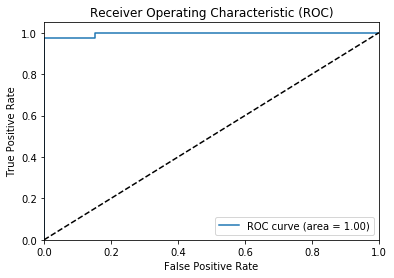

In [30]:
pred = model.predict(x_test)
plot_roc(y_test, pred)

In [24]:
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

df.drop("id", inplace = True, axis=1)

dummies = pd.get_dummies(df["area"], prefix="area")
df = pd.concat([df, dummies], axis=1)
df = df.drop("area", axis=1)
dummies = pd.get_dummies(df["job"], prefix="job")
df = pd.concat([df, dummies], axis = 1)
df = df.drop("job", axis=1)

In [25]:
nonna = df[df["income"].notna()]
isna = df[df["income"].isnull()]
nx = nonna.drop(["income", "product"], axis=1).values
ny = nonna["income"].values
nx_train, nx_test, ny_train, ny_test = train_test_split(nx, ny, test_size=0.2)
reg = LinearRegression().fit(nx_train, ny_train)
isna["income"] = reg.predict(isna.drop(["income", "product"], axis=1))
df = pd.concat([isna, nonna], axis=0)

C:\ProgramData\Anaconda3\envs\ml_bace\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [26]:
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])


In [27]:
df.head()

,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,...,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz
35,0.092005,-0.494600,-0.208449,5.454545,-0.387695,5.240972,1.124377,0.874016,0.417323,0.238394,...,0,0,0,0,0,0,0,0,0,0
69,0.061258,-0.996591,-0.208449,9.289907,-0.542432,4.717718,0.314210,0.858268,0.503937,0.263349,...,0,0,0,0,0,0,0,0,0,0
101,0.675654,1.360973,-1.255928,16.715820,-0.353308,11.770971,-0.495957,0.925197,0.692913,0.086156,...,0,0,0,0,0,0,0,0,0,0
134,-0.131529,-1.408940,-0.208449,7.875447,0.282834,10.313334,-0.495957,0.826772,0.586614,0.303499,...,0,0,0,1,0,0,0,0,0,0
155,0.668905,0.724521,-0.208449,12.989263,0.661081,33.368554,-0.766013,0.992126,0.775591,0.443469,...,0,0,0,1,0,0,0,0,0,0


In [30]:
x_columns = df.columns.drop('product')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # Classification
products = dummies.columns
y = dummies.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation="relu", kernel_initializer="random_normal"))
model.add(Dense(50, activation="relu", kernel_initializer="random_normal"))
model.add(Dense(25, activation="relu", kernel_initializer="random_normal"))
model.add(Dense(y.shape[1], activation="softmax", kernel_initializer="random_normal"))
model.compile(loss="categorical_crossentropy", optimizer=tensorflow.keras.optimizers.Adam(), metrics=["accuracy"])
monitor = EarlyStopping(monitor="val_loss", min_delta=1e-3, patience=5, verbose=1,
                        mode="auto", restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)



Train on 1600 samples, validate on 400 samples
Epoch 1/1000
1600/1600 - 1s - loss: 1.6134 - accuracy: 0.3594 - val_loss: 1.1698 - val_accuracy: 0.4750
Epoch 2/1000
1600/1600 - 0s - loss: 1.1519 - accuracy: 0.4837 - val_loss: 1.1040 - val_accuracy: 0.4850
Epoch 3/1000
1600/1600 - 0s - loss: 1.0662 - accuracy: 0.4944 - val_loss: 0.9532 - val_accuracy: 0.5125
Epoch 4/1000
1600/1600 - 0s - loss: 0.9203 - accuracy: 0.6144 - val_loss: 0.7994 - val_accuracy: 0.6975
Epoch 5/1000
1600/1600 - 0s - loss: 0.8243 - accuracy: 0.6650 - val_loss: 0.7553 - val_accuracy: 0.6925
Epoch 6/1000
1600/1600 - 0s - loss: 0.7820 - accuracy: 0.6837 - val_loss: 0.7229 - val_accuracy: 0.7275
Epoch 7/1000
1600/1600 - 0s - loss: 0.7763 - accuracy: 0.6675 - val_loss: 0.6957 - val_accuracy: 0.7300
Epoch 8/1000
1600/1600 - 0s - loss: 0.7437 - accuracy: 0.6869 - val_loss: 0.6975 - val_accuracy: 0.7125
Epoch 9/1000
1600/1600 - 0s - loss: 0.7331 - accuracy: 0.6844 - val_loss: 0.6990 - val_accuracy: 0.7150
Epoch 10/1000
160

In [43]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
pred

array([1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 3, 2, 1, 2, 2, 2, 1,
       2, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 3, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2,
       2, 1, 1, 3, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 3, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2,
       2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 3, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 3, 2, 0, 0, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 2, 2, 3, 1, 1,
       1, 3, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1,

In [47]:
y_compare = np.argmax(y_test, axis=1)
score = metrics.accuracy_score(y_compare, pred)
score

0.7375

In [48]:
from IPython.display import display

# Don't display numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

# Generate predictions
pred = model.predict(x_test)

print("Numpy array of predictions")
display(pred[0:5])

print("As percent probability")
print(pred[0]*100)

score = metrics.log_loss(y_test, pred)
print("Log loss score: {}".format(score))

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

Numpy array of predictions


array([[0.0013, 0.8839, 0.0732, 0.    , 0.0274, 0.0142, 0.0001],
       [0.    , 0.6475, 0.3513, 0.    , 0.0011, 0.0002, 0.    ],
       [0.    , 0.4613, 0.5377, 0.0002, 0.0007, 0.0001, 0.    ],
       [0.    , 0.7467, 0.2466, 0.    , 0.0062, 0.0004, 0.    ],
       [0.0001, 0.8706, 0.1176, 0.    , 0.0097, 0.002 , 0.    ]],
      dtype=float32)

As percent probability
[ 0.1283 88.3865  7.3177  0.      2.742   1.4204  0.0051]
Log loss score: 0.6171763699594885


C:\ProgramData\Anaconda3\envs\ml_bace\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'log(x)')

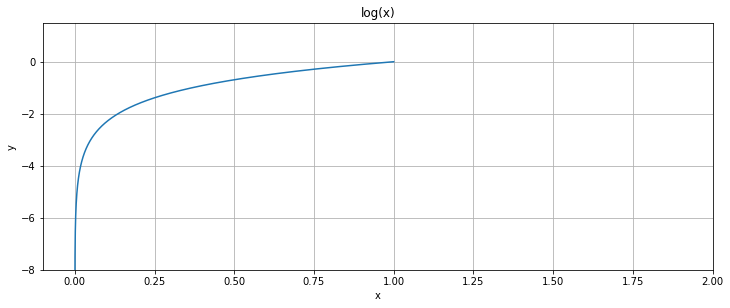

In [59]:
%matplotlib inline
#t = np.arange(1e-5, 5.0, 0.00001)
#t = np.arange(1.0, 5.0, 0.00001) # computer scientists
t = np.arange(0.0, 1.0, 0.00001)  # data     scientists

fig = plt.figure(1, figsize=(12, 10))
ax1 = fig.add_subplot(211)
ax1.plot(t, np.log(t))
ax1.grid(True)
ax1.set_ylim((-8, 1.5))
ax1.set_xlim((-0.1, 2))
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('log(x)')



Confusion matrix, without normalization
[[ 26   1   0   0   0   0   0]
 [  5 144  40   1   0   0   0]
 [  0  26 119   4   0   0   0]
 [  0   0   4   6   0   0   0]
 [  0   3   0   0   0   0   0]
 [ 16   3   0   0   0   0   0]
 [  2   0   0   0   0   0   0]]
Normalized confusion matrix
[[0.96 0.04 0.   0.   0.   0.   0.  ]
 [0.03 0.76 0.21 0.01 0.   0.   0.  ]
 [0.   0.17 0.8  0.03 0.   0.   0.  ]
 [0.   0.   0.4  0.6  0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.84 0.16 0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]]


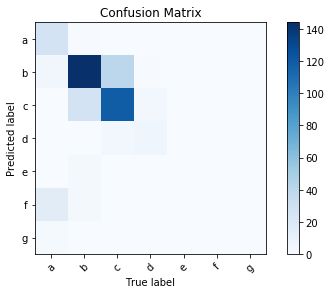

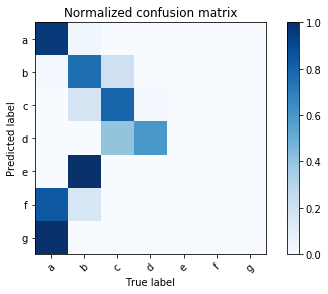

In [62]:
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, products)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, products, title='Normalized confusion matrix')

plt.show()

In [63]:
print(cm.astype('float')) 
print(cm.sum(axis=1)[:, np.newaxis])

[[ 26.   1.   0.   0.   0.   0.   0.]
 [  5. 144.  40.   1.   0.   0.   0.]
 [  0.  26. 119.   4.   0.   0.   0.]
 [  0.   0.   4.   6.   0.   0.   0.]
 [  0.   3.   0.   0.   0.   0.   0.]
 [ 16.   3.   0.   0.   0.   0.   0.]
 [  2.   0.   0.   0.   0.   0.   0.]]
[[ 27]
 [190]
 [149]
 [ 10]
 [  3]
 [ 19]
 [  2]]
